In [1]:
import anndata
import os
import requests

save_path = "../../data/example_sce.h5ad"
if not os.path.exists(save_path):
    response = requests.get("https://go.wisc.edu/69435h")
    with open(save_path, "wb") as f:
        f.write(response.content)

example_sce = anndata.read_h5ad(save_path)
example_sce

AnnData object with n_obs × n_vars = 2087 × 100
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'cell_type', 'sizeFactor', 'pseudotime'
    var: 'highly_variable_genes'
    uns: 'X_name', 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'PCA', 'UMAP', 'X_pca', 'X_umap'
    layers: 'counts', 'cpm', 'logcounts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

# PNMF

In [2]:
from scdesigner.experimental.simulators.pnmf_regression import PNMFRegressionSimulator
from scdesigner.experimental.diagnose.plot import plot_hist, plot_umap

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `annda

In [3]:
formula = "~ bs(pseudotime, degree=5)"
model = PNMFRegressionSimulator()
params = model.estimate(example_sce, formula, maxIter=500, epochs=50, lr=0.1)

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


In [4]:
params["W"]

0             1         2             3         4   \
Pyy            0.000000  1.000645e-09  0.000000  0.000000e+00  0.000000   
Iapp           0.000000  9.094532e-02  0.000000  5.263260e-10  0.000000   
Chgb           0.000000  1.602644e-05  0.000000  2.523943e-09  0.000002   
Rbp4           0.000000  4.590327e-01  0.000000  0.000000e+00  0.000015   
Spp1           0.000000  0.000000e+00  0.000000  0.000000e+00  0.000000   
...                 ...           ...       ...           ...       ...   
Ffar2          0.000111  0.000000e+00  0.056024  4.563334e-07  0.000009   
Hes6           0.000015  0.000000e+00  0.010517  6.888722e-03  0.000000   
Serpinh1       0.000000  0.000000e+00  0.000001  0.000000e+00  0.000000   
Npy            0.000000  0.000000e+00  0.000000  0.000000e+00  0.000000   
1110012L19Rik  0.000018  0.000000e+00  0.000144  5.416631e-07  0.000000   

                         5             6             7             8   \
Pyy            0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Iapp           0.000000e+00  0.000000e+00  4.642987e-05  5.591146e-08   
Chgb           0.000000e+00  6.560435e-01  4.555610e-07  1.089758e-09   
Rbp4           3.086688e-08  0.000000e+00  8.304599e-06  9.873415e-07   
Spp1           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
...                     ...           ...           ...           ...   
Ffar2          0.000000e+00  1.021207e-01  0.000000e+00  0.000000e+00   
Hes6           1.491521e-08  1.959369e-09  2.239717e-06  8.366393e-04   
Serpinh1       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Npy            0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1110012L19Rik  0.000000e+00  4.744462e-06  0.000000e+00  0.000000e+00   

                         9         10            11            12  \
Pyy            0.000000e+00  0.000000  8.844339e-01  0.000000e+00   
Iapp           0.000000e+00  0.000000  1.552029e-02  0.000000e+00   
Chgb           0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
Rbp4           0.000000e+00  0.000000  4.299997e-02  0.000000e+00   
Spp1           0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
...                     ...       ...           ...           ...   
Ffar2          2.992565e-02  0.021209  0.000000e+00  1.059382e-03   
Hes6           3.043790e-08  0.000003  5.222466e-08  3.234574e-08   
Serpinh1       0.000000e+00  0.000008  0.000000e+00  0.000000e+00   
Npy            0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
1110012L19Rik  2.509253e-01  0.000137  0.000000e+00  8.938061e-06   

                         13        14            15            16        17  \
Pyy            0.000000e+00  0.000000  8.115713e-09  4.192020e-10  0.000000   
Iapp           0.000000e+00  0.000000  5.120939e-01  5.260329e-05  0.000000   
Chgb           0.000000e+00  0.000000  0.000000e+00  0.000000e+00  0.000000   
Rbp4           0.000000e+00  0.000000  1.651178e-08  1.233252e-08  0.000000   
Spp1           0.000000e+00  0.000000  0.000000e+00  0.000000e+00  0.493970   
...                     ...       ...           ...           ...       ...   
Ffar2          1.286202e-05  0.031469  0.000000e+00  0.000000e+00  0.000000   
Hes6           9.893779e-07  0.213798  0.000000e+00  6.393817e-04  0.000000   
Serpinh1       9.892209e-10  0.000000  0.000000e+00  2.947907e-08  0.063612   
Npy            0.000000e+00  0.000000  1.090947e-01  0.000000e+00  0.000000   
1110012L19Rik  1.050516e-04  0.000682  0.000000e+00  0.000000e+00  0.000000   

                     18            19  
Pyy            0.000000  0.000000e+00  
Iapp           0.000000  0.000000e+00  
Chgb           0.000000  3.576000e-08  
Rbp4           0.000000  1.254541e-06  
Spp1           0.000000  0.000000e+00  
...                 ...           ...  
Ffar2          0.000996  3.122153e-02  
Hes6           0.061593  4.754992e-02  
Serpinh1       0.183829  0.000000e+00  
Npy            0.000000  0.000000e+00  
1110012L19Rik  0.000223  

In [5]:
model

method: 'PNMFRegression'
    formula: '~ bs(pseudotime, degree=5)'
    parameters: 'a', 'loc', 'beta', 'W'

In [6]:
model.predict(params, example_sce.obs, formula)["a"]

0         1         2         3         4         5   \
AAACCTGAGAGGGATA  2.699439  6.719035  4.932288  6.284447  6.889600  7.220629   
AAACCTGGTAAGTGGC  3.746444  5.012169  6.889351  6.046022  5.299375  7.270156   
AAACGGGCAAAGAATC  2.414847  6.806927  4.368552  6.280904  6.473043  7.073874   
AAACGGGGTACAGTTC  2.842746  5.846284  4.180346  6.993063  3.973646  6.188568   
AAACGGGGTGAAATCA  3.691759  4.551947  6.956450  5.750372  4.614818  7.224451   
...                    ...       ...       ...       ...       ...       ...   
TTTGGTTTCACTTACT  1.130353  2.849114  3.785016  2.535135  1.733880  5.901321   
TTTGGTTTCCTTTCGG  2.347290  6.727557  4.140421  6.338205  6.012783  6.933847   
TTTGTCAAGAATGTGT  2.595957  6.772826  4.743003  6.274712  6.811367  7.185971   
TTTGTCAAGTGACATA  3.177273  6.305267  5.756149  6.333133  6.799144  7.295844   
TTTGTCAAGTGTGGCA  3.466346  4.090076  6.804360  5.309338  3.879127  7.144664   

                        6         7         8         9         10        11  \
AAACCTGAGAGGGATA  4.628101  5.236017  6.128699  6.369958  4.805432  2.765609   
AAACCTGGTAAGTGGC  3.379745  4.212262  5.624775  8.382203  4.891192  1.985751   
AAACGGGCAAAGAATC  4.376155  5.061292  6.368666  5.583941  4.683731  3.013169   
AAACGGGGTACAGTTC  2.666309  4.235568  6.065402  5.618239  4.297985  3.350210   
AAACGGGGTGAAATCA  2.877605  3.722422  5.662665  8.153036  4.832301  1.865045   
...                    ...       ...       ...       ...       ...       ...   
TTTGGTTTCACTTACT  0.765398  0.952854  5.217698  2.558803  3.874780  1.341419   
TTTGGTTTCCTTTCGG  4.074053  4.877868  6.458962  5.267913  4.595341  3.145695   
TTTGTCAAGAATGTGT  4.585838  5.203362  6.207086  6.109599  4.772416  2.842410   
TTTGTCAAGTGACATA  4.514012  5.167510  5.834146  7.429676  4.899291  2.461725   
TTTGTCAAGTGTGGCA  2.340596  3.150497  5.729233  7.570005  4.736731  1.753024   

                        12        13         14        15        16        17  \
AAACCTGAGAGGGATA  7.023025  2.098044   6.447912  2.660766  5.115186  5.448217   
AAACCTGGTAAGTGGC  6.312399  1.989212  10.096776  2.534786  4.758572  5.913725   
AAACGGGCAAAGAATC  6.702290  2.121309   5.370433  2.988014  5.501411  5.457454   
AAACGGGGTACAGTTC  5.187708  2.224772   4.992353  4.876825  6.934008  5.654754   
AAACGGGGTGAAATCA  5.930710  1.943538  10.215249  2.557623  4.818390  6.079078   
...                    ...       ...        ...       ...       ...       ...   
TTTGGTTTCACTTACT  4.138504  1.389381   4.611488  1.849479  4.468380  6.035279   
TTTGGTTTCCTTTCGG  6.394946  2.138855   4.927747  3.296209  5.796945  5.489092   
TTTGTCAAGAATGTGT  6.953014  2.104610   6.087891  2.738124  5.217781  5.444588   
TTTGTCAAGTGACATA  7.065013  2.071514   8.000169  2.498711  4.829734  5.524665   
TTTGTCAAGTGTGGCA  5.507405  1.880420   9.933782  2.552574  4.890073  6.244953   

                        18        19  
AAACCTGAGAGGGATA  4.927159  3.723242  
AAACCTGGTAAGTGGC  6.145289  3.077913  
AAACGGGCAAAGAATC  4.642019  3.815334  
AAACGGGGTACAGTTC  4.348447  3.738552  
AAACGGGGTGAAATCA  6.328051  2.905638  
...                    ...       ...  
TTTGGTTTCACTTACT  5.334900  1.891890  
TTTGGTTTCCTTTCGG  4.512377  3.839762  
TTTGTCAAGAATGTGT  4.832813  3.757269  
TTTGTCAAGTGACATA  5.352034  3.543125  
TTTGTCAAGTGTGGCA  6.439769  2.717228  

[2087 rows x 20 columns]

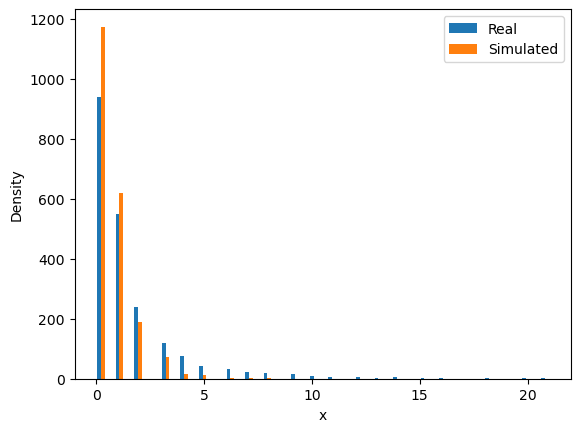

In [7]:
import numpy as np
sample = model.sample(params, example_sce.obs, formula)
plot_hist(sample.X, np.array(example_sce.X.todense()), 99) # sometimes simulates large outliers (like reads >10000)

In [8]:
combined = anndata.concat({"real": example_sce, "sim": sample}, label="source")
plot_umap(combined, color="pseudotime", facet="source")

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


alt.FacetChart(...)

# NB Regression

In [9]:
from scdesigner.experimental.simulators.nb_regression import NegBinRegressionSimulator
from scdesigner.experimental.diagnose.plot import plot_hist, plot_umap

In [10]:
formula = "~ bs(pseudotime, degree=5)"
model = NegBinRegressionSimulator()
params = model.estimate(example_sce, formula, epochs=50, lr=0.1)

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


In [11]:
model

scDesigner simulator object with
    method: 'Negtive Binomial Regression'
    formula: '~ bs(pseudotime, degree=5)'
    parameters: 'coefficient', 'dispersion'

In [12]:
params["coefficient"]

Pyy      Iapp      Chgb      Rbp4  \
Intercept                    2.004122  2.094542  1.372600  1.592727   
bs(pseudotime, degree=5)[1] -7.904492 -6.708659 -5.926269 -9.479390   
bs(pseudotime, degree=5)[2]  0.408557 -6.670922  1.638484 -1.315107   
bs(pseudotime, degree=5)[3]  1.997858  0.446016  2.804847  1.964774   
bs(pseudotime, degree=5)[4]  2.400301  2.087755  2.683754  2.689841   
bs(pseudotime, degree=5)[5]  2.441004  2.459161  1.631847  2.242723   

                                  Spp1      Chga       Cck      Ins1  \
Intercept                     3.279739  0.747607  0.794146  1.908508   
bs(pseudotime, degree=5)[1]   2.472988 -8.526789  1.644348 -5.764563   
bs(pseudotime, degree=5)[2]  -4.189708  3.605336  3.244707 -5.412760   
bs(pseudotime, degree=5)[3] -10.899934  3.939086  2.478705 -7.063535   
bs(pseudotime, degree=5)[4]  -2.875542  2.528735 -0.082990  1.361187   
bs(pseudotime, degree=5)[5]  -4.194032  1.440708 -0.236683  2.365887   

                                 Nnat      Ins2  ...    Nkx6-1     Fxyd3  \
Intercept                    1.423896  1.460753  ...  0.260221 -0.120525   
bs(pseudotime, degree=5)[1] -4.259786 -8.006792  ... -0.009056 -1.679568   
bs(pseudotime, degree=5)[2] -0.785435 -6.668592  ...  2.854347  3.682104   
bs(pseudotime, degree=5)[3] -4.282811 -8.808233  ...  0.412907  0.935015   
bs(pseudotime, degree=5)[4]  1.227357  1.375566  ...  0.461670  0.865466   
bs(pseudotime, degree=5)[5]  2.779210  2.707181  ...  1.750310  0.369767   

                                  Hn1   Smarcd2     Pdia6     Ffar2      Hes6  \
Intercept                    1.029008 -0.347109  0.909288 -0.710548 -0.537028   
bs(pseudotime, degree=5)[1]  1.096825  2.681563  1.817682  0.858354  4.627252   
bs(pseudotime, degree=5)[2]  2.658057  3.756625 -1.791127  2.002196  2.866711   
bs(pseudotime, degree=5)[3] -1.695613 -0.685472 -3.213197  3.104697 -1.570228   
bs(pseudotime, degree=5)[4] -1.039982 -1.282296  1.153441  0.924166  1.809952   
bs(pseudotime, degree=5)[5] -0.303720 -0.411079  1.808978  0.480249  0.411194   

                             Serpinh1       Npy  1110012L19Rik  
Intercept                    1.518809 -1.943178      -0.568282  
bs(pseudotime, degree=5)[1]  0.489935 -4.745972      -2.600132  
bs(pseudotime, degree=5)[2]  0.874813 -3.791385       5.355726  
bs(pseudotime, degree=5)[3] -3.771745 -4.318643       3.512386  
bs(pseudotime, degree=5)[4] -2.768361 -4.404174      -3.248198  
bs(pseudotime, degree=5)[5] -1.523032  5.288521       0.219262  

[6 rows x 100 columns]

In [13]:
model.predict(params, example_sce.obs, formula)["coefficient"]

Pyy       Iapp       Chgb       Rbp4       Spp1  \
AAACCTGAGAGGGATA  36.079803   7.558312  31.774660  18.356491   0.092897   
AAACCTGGTAAGTGGC   3.174667   0.261756   5.030446   0.832230   0.461349   
AAACGGGCAAAGAATC  53.349614  18.721642  37.241879  31.457126   0.127104   
AAACGGGGTACAGTTC  81.922243  75.922855  28.295586  50.965726   0.428164   
AAACGGGGTGAAATCA   1.691517   0.159875   2.870608   0.402359   1.008439   
...                     ...        ...        ...        ...        ...   
TTTGGTTTCACTTACT   0.555816   0.518190   0.634187   0.190472  39.823254   
TTTGGTTTCCTTTCGG  63.058429  29.793103  37.726732  39.420443   0.172488   
TTTGTCAAGAATGTGT  41.257814  10.093964  33.968011  22.072621   0.098933   
TTTGTCAAGTGACATA  18.362295   2.211684  20.656800   7.407429   0.100309   
TTTGTCAAGTGTGGCA   0.901721   0.113871   1.592608   0.201859   2.465378   

                       Chga        Cck       Ins1       Nnat       Ins2  ...  \
AAACCTGAGAGGGATA  27.899238   8.126648   0.535480   1.773518   0.155754  ...   
AAACCTGGTAAGTGGC   3.872603  18.294539   0.054656   0.470401   0.008775  ...   
AAACGGGCAAAGAATC  27.695299   5.321627   1.776515   3.673668   0.675626  ...   
AAACGGGGTACAGTTC  13.492893   2.078733  35.002543  31.624750  26.091725  ...   
AAACGGGGTGAAATCA   1.832046  17.964704   0.052026   0.430019   0.007989  ...   
...                     ...        ...        ...        ...        ...  ...   
TTTGGTTTCACTTACT   0.167322   5.033622   0.607705   0.906663   0.164032  ...   
TTTGGTTTCCTTTCGG  24.908643   4.090836   3.871988   6.094736   1.750010  ...   
TTTGTCAAGAATGTGT  28.537830   7.179519   0.756077   2.174348   0.237710  ...   
TTTGTCAAGTGACATA  20.032069  12.488960   0.166330   0.913820   0.036806  ...   
TTTGTCAAGTGTGGCA   0.801766  16.281401   0.058178   0.414100   0.008846  ...   

                    Nkx6-1     Fxyd3       Hn1   Smarcd2      Pdia6     Ffar2  \
AAACCTGAGAGGGATA  3.454827  2.814100  1.706142  0.680509   1.362609  2.763675   
AAACCTGGTAAGTGGC  4.110610  2.987368  5.144456  3.426295   1.012415  2.922402   
AAACGGGCAAAGAATC  3.379190  2.355397  1.418012  0.467466   2.251876  2.178235   
AAACGGGGTACAGTTC  4.967409  1.523722  1.605362  0.370364  10.023693  1.012252   
AAACGGGGTGAAATCA  3.940214  2.540900  6.192575  4.334168   1.237103  2.557246   
...                    ...       ...       ...       ...        ...       ...   
TTTGGTTTCACTTACT  1.618279  0.677714  4.879602  2.298521   3.859873  0.785814   
TTTGGTTTCCTTTCGG  3.474321  2.101575  1.352631  0.399248   3.238529  1.821720   
TTTGTCAAGAATGTGT  3.407575  2.674735  1.592940  0.599806   1.560370  2.595241   
TTTGTCAAGTGACATA  3.765359  3.274858  2.433517  1.206912   0.941273  3.242814   
TTTGTCAAGTGTGGCA  3.581280  2.005186  7.062129  5.045635   1.617671  2.130811   

                      Hes6  Serpinh1       Npy  1110012L19Rik  
AAACCTGAGAGGGATA  1.271297  0.493841  0.007896       1.255089  
AAACCTGGTAAGTGGC  3.535536  1.921493  0.003070       3.572731  
AAACGGGCAAAGAATC  1.199819  0.428482  0.018672       0.646228  
AAACGGGGTACAGTTC  1.195616  0.647248  1.268672       0.321665  
AAACGGGGTGAAATCA  4.645780  2.634826  0.003232       2.942625  
...                    ...       ...       ...            ...  
TTTGGTTTCACTTACT  3.379524  5.556862  0.021012       0.369905  
TTTGGTTTCCTTTCGG  1.210173  0.429353  0.038513       0.450040  
TTTGTCAAGAATGTGT  1.234562  0.464632  0.009848       1.027332  
TTTGTCAAGTGACATA  1.601084  0.716748  0.004289       2.500975  
TTTGTCAAGTGTGGCA  5.896523  3.532660  0.003690       2.079854  

[2087 rows x 100 columns]

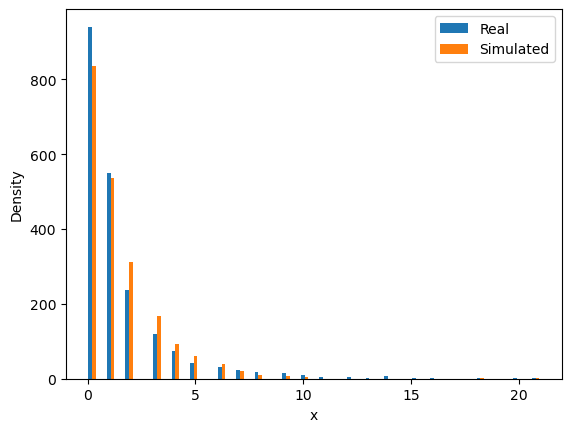

In [14]:
import numpy as np
sample = model.sample(params, example_sce.obs, formula)
plot_hist(sample.X, np.array(example_sce.X.todense()), 99)

In [15]:
combined = anndata.concat({"real": example_sce, "sim": sample}, label="source")
plot_umap(combined, color="pseudotime", facet="source")

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


alt.FacetChart(...)

# NB Copula

In [16]:
from scdesigner.experimental.simulators.nb_copula import NegBinCopulaSimulator
from scdesigner.experimental.diagnose.plot import plot_hist, plot_umap

In [17]:
formula = "~ bs(pseudotime, degree=5)"
model = NegBinCopulaSimulator()
params = model.estimate(example_sce, formula, epochs=50, lr=0.1)

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


In [18]:
model

scDesigner simulator object with
    method: 'Negtive Binomial Gaussian Copula'
    formula: '~ bs(pseudotime, degree=5)'
    copula formula: '~ 1'
    parameters: 'coefficient', 'dispersion', 'covariance'

In [19]:
model.predict(params, example_sce.obs, formula)["coefficient"]

Pyy       Iapp       Chgb       Rbp4       Spp1  \
AAACCTGAGAGGGATA  36.079803   7.558312  31.774660  18.356491   0.092897   
AAACCTGGTAAGTGGC   3.174667   0.261756   5.030446   0.832230   0.461349   
AAACGGGCAAAGAATC  53.349614  18.721642  37.241879  31.457126   0.127104   
AAACGGGGTACAGTTC  81.922243  75.922855  28.295586  50.965726   0.428164   
AAACGGGGTGAAATCA   1.691517   0.159875   2.870608   0.402359   1.008439   
...                     ...        ...        ...        ...        ...   
TTTGGTTTCACTTACT   0.555816   0.518190   0.634187   0.190472  39.823254   
TTTGGTTTCCTTTCGG  63.058429  29.793103  37.726732  39.420443   0.172488   
TTTGTCAAGAATGTGT  41.257814  10.093964  33.968011  22.072621   0.098933   
TTTGTCAAGTGACATA  18.362295   2.211684  20.656800   7.407429   0.100309   
TTTGTCAAGTGTGGCA   0.901721   0.113871   1.592608   0.201859   2.465378   

                       Chga        Cck       Ins1       Nnat       Ins2  ...  \
AAACCTGAGAGGGATA  27.899238   8.126648   0.535480   1.773518   0.155754  ...   
AAACCTGGTAAGTGGC   3.872603  18.294539   0.054656   0.470401   0.008775  ...   
AAACGGGCAAAGAATC  27.695299   5.321627   1.776515   3.673668   0.675626  ...   
AAACGGGGTACAGTTC  13.492893   2.078733  35.002543  31.624750  26.091725  ...   
AAACGGGGTGAAATCA   1.832046  17.964704   0.052026   0.430019   0.007989  ...   
...                     ...        ...        ...        ...        ...  ...   
TTTGGTTTCACTTACT   0.167322   5.033622   0.607705   0.906663   0.164032  ...   
TTTGGTTTCCTTTCGG  24.908643   4.090836   3.871988   6.094736   1.750010  ...   
TTTGTCAAGAATGTGT  28.537830   7.179519   0.756077   2.174348   0.237710  ...   
TTTGTCAAGTGACATA  20.032069  12.488960   0.166330   0.913820   0.036806  ...   
TTTGTCAAGTGTGGCA   0.801766  16.281401   0.058178   0.414100   0.008846  ...   

                    Nkx6-1     Fxyd3       Hn1   Smarcd2      Pdia6     Ffar2  \
AAACCTGAGAGGGATA  3.454827  2.814100  1.706142  0.680509   1.362609  2.763675   
AAACCTGGTAAGTGGC  4.110610  2.987368  5.144456  3.426295   1.012415  2.922402   
AAACGGGCAAAGAATC  3.379190  2.355397  1.418012  0.467466   2.251876  2.178235   
AAACGGGGTACAGTTC  4.967409  1.523722  1.605362  0.370364  10.023693  1.012252   
AAACGGGGTGAAATCA  3.940214  2.540900  6.192575  4.334168   1.237103  2.557246   
...                    ...       ...       ...       ...        ...       ...   
TTTGGTTTCACTTACT  1.618279  0.677714  4.879602  2.298521   3.859873  0.785814   
TTTGGTTTCCTTTCGG  3.474321  2.101575  1.352631  0.399248   3.238529  1.821720   
TTTGTCAAGAATGTGT  3.407575  2.674735  1.592940  0.599806   1.560370  2.595241   
TTTGTCAAGTGACATA  3.765359  3.274858  2.433517  1.206912   0.941273  3.242814   
TTTGTCAAGTGTGGCA  3.581280  2.005186  7.062129  5.045635   1.617671  2.130811   

                      Hes6  Serpinh1       Npy  1110012L19Rik  
AAACCTGAGAGGGATA  1.271297  0.493841  0.007896       1.255089  
AAACCTGGTAAGTGGC  3.535536  1.921493  0.003070       3.572731  
AAACGGGCAAAGAATC  1.199819  0.428482  0.018672       0.646228  
AAACGGGGTACAGTTC  1.195616  0.647248  1.268672       0.321665  
AAACGGGGTGAAATCA  4.645780  2.634826  0.003232       2.942625  
...                    ...       ...       ...            ...  
TTTGGTTTCACTTACT  3.379524  5.556862  0.021012       0.369905  
TTTGGTTTCCTTTCGG  1.210173  0.429353  0.038513       0.450040  
TTTGTCAAGAATGTGT  1.234562  0.464632  0.009848       1.027332  
TTTGTCAAGTGACATA  1.601084  0.716748  0.004289       2.500975  
TTTGTCAAGTGTGGCA  5.896523  3.532660  0.003690       2.079854  

[2087 rows x 100 columns]

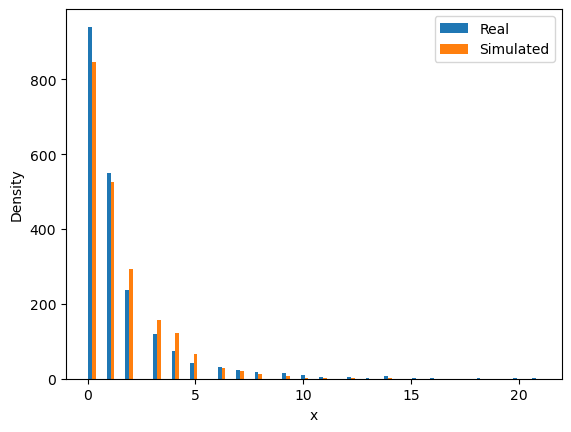

In [20]:
import numpy as np
sample = model.sample(params, example_sce.obs, formula)
plot_hist(sample.X, np.array(example_sce.X.todense()), 99)

In [21]:
combined = anndata.concat({"real": example_sce, "sim": sample}, label="source")
plot_umap(combined, color="pseudotime", facet="source")

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


alt.FacetChart(...)